In [3]:
# Importing necessary python modules for project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_store = pd.read_csv(r"C:\Users\RenukaHebasur\Projects\Data\googleplaystore.csv")
df_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
df_store.shape

(10841, 13)

In [9]:
df_store.info(), len(df_store), df_store.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


(None,
 10841,
 App                object
 Category           object
 Rating            float64
 Reviews            object
 Size               object
 Installs           object
 Type               object
 Price              object
 Content Rating     object
 Genres             object
 Last Updated       object
 Current Ver        object
 Android Ver        object
 dtype: object)

In [11]:
#genrating descriptive statistics of numerical columns
df_store.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [13]:
#finding duplicates
df_store.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10836    False
10837    False
10838    False
10839    False
10840    False
Length: 10841, dtype: bool

In [15]:
#finding missing values
df_store.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [17]:
#handling missing values
df_store.dropna(inplace=True) #drops rows with missing values


In [19]:
#dealing with duplicates
df_store.drop_duplicates(inplace=True)

In [21]:
df_store.info(), len(df_store)

<class 'pandas.core.frame.DataFrame'>
Index: 8886 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8886 non-null   object 
 1   Category        8886 non-null   object 
 2   Rating          8886 non-null   float64
 3   Reviews         8886 non-null   object 
 4   Size            8886 non-null   object 
 5   Installs        8886 non-null   object 
 6   Type            8886 non-null   object 
 7   Price           8886 non-null   object 
 8   Content Rating  8886 non-null   object 
 9   Genres          8886 non-null   object 
 10  Last Updated    8886 non-null   object 
 11  Current Ver     8886 non-null   object 
 12  Android Ver     8886 non-null   object 
dtypes: float64(1), object(12)
memory usage: 971.9+ KB


(None, 8886)

In [23]:
df_store.isna().sum()
#found no missing values

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [25]:
#check duplicates
df_store.duplicated().sum()

0

In [27]:
df_store["Installs"] = df_store["Installs"].astype(str)  # Convert everything to string
df_store["Installs"] = df_store["Installs"].str.replace("+", "", regex=False)  # Remove "+"
df_store["Installs"] = df_store["Installs"].str.replace(",", "", regex=False)  # Remove ","
df_store["Installs"] = pd.to_numeric(df_store["Installs"], errors='coerce')  # Convert to numbers
df_store = df_store.dropna(subset=["Installs"])  # Drop NaN values
df_store["Installs"] = df_store["Installs"].astype(int)  # Convert to integer



In [29]:
df_store["Reviews"] = pd.to_numeric(df_store["Reviews"], errors="coerce")  # Convert to numeric
df_store = df_store.dropna(subset=["Reviews"])  # Remove NaN values if any
df_store["Reviews"] = df_store["Reviews"].astype(int)  # Convert to integer


In [31]:
df_store

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [33]:
df_store.shape

(8886, 13)

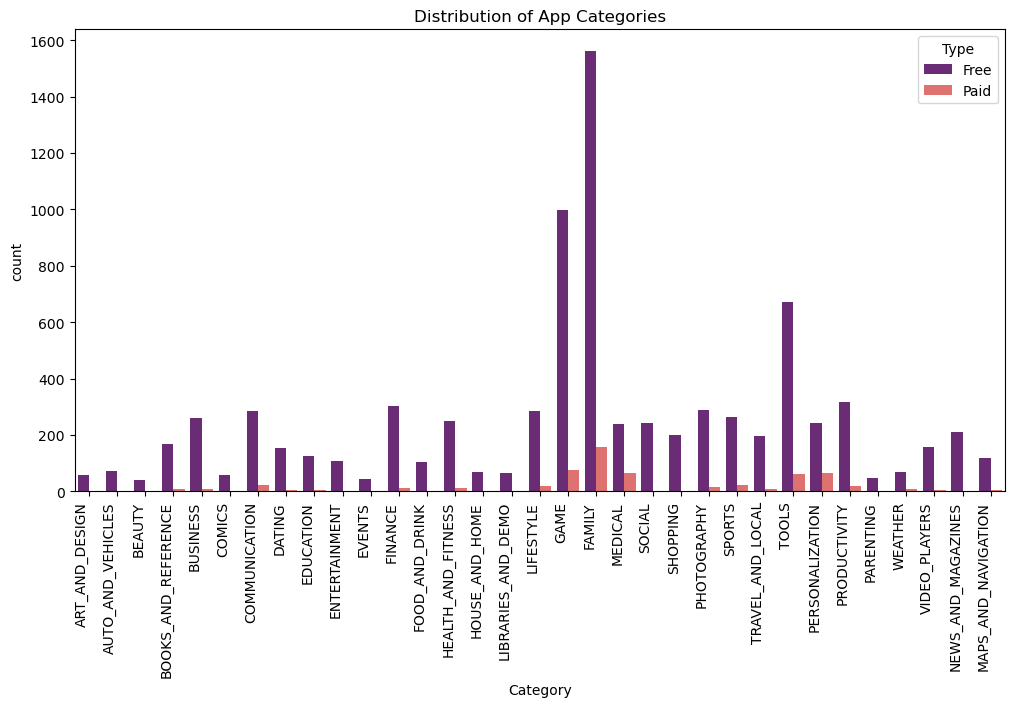

In [71]:
#bar plot
plt.figure(figsize=(12, 6))
sns.countplot(data=df_store, x="Category", hue="Type", palette="magma")
plt.xticks(rotation = 90, ha="right")
plt.xlabel("Category")
plt.ylabel("count")
plt.title("Distribution of App Categories")
plt.savefig("images/Distribution of App Categories.png", dpi=300, bbox_inches='tight')
plt.show();

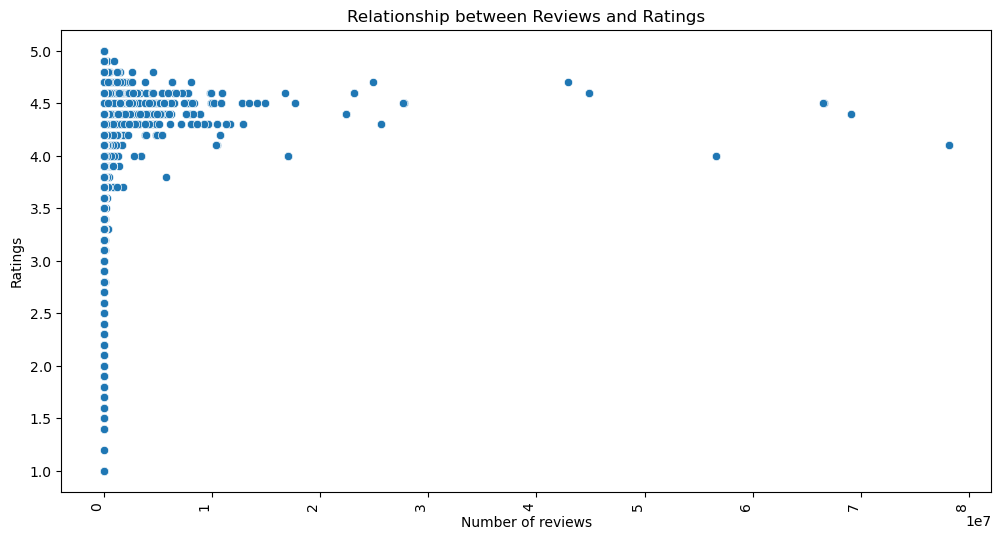

In [37]:
#Scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_store, x="Reviews", y="Rating")
plt.xticks(rotation = 90, ha="right")
plt.xlabel("Number of reviews")
plt.ylabel("Ratings")
plt.title("Relationship between Reviews and Ratings")
plt.savefig("images/Relationship between Reviews and Ratings.png", dpi=300, bbox_inches='tight')
plt.show();

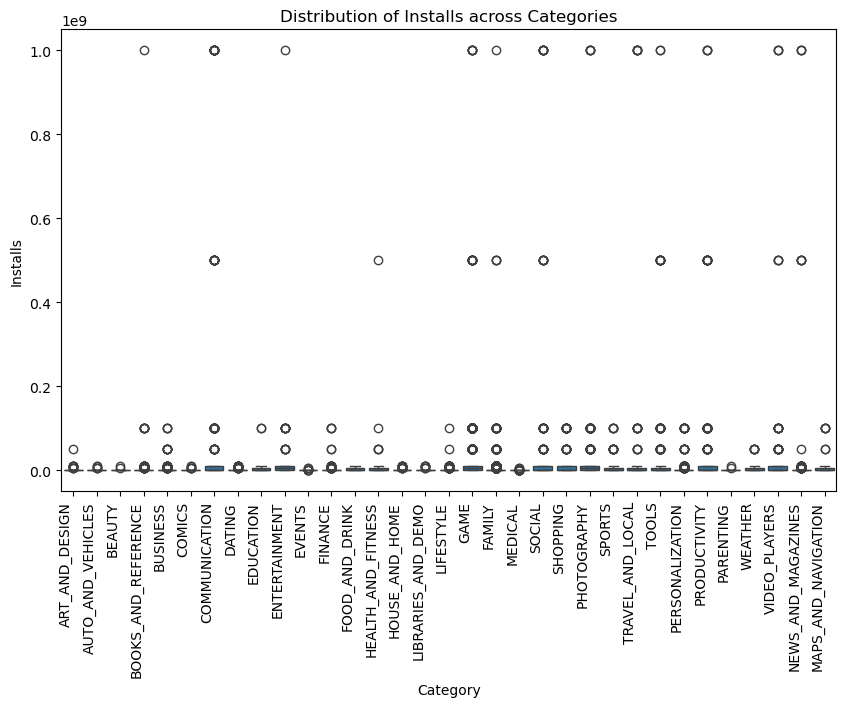

In [39]:
#Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_store, x="Category", y="Installs")
plt.xticks(rotation = 90, ha="right")
plt.xlabel("Category")
plt.ylabel("Installs")
plt.title("Distribution of Installs across Categories")
plt.savefig("images/Distribution of Installs across Categories.png", dpi=300, bbox_inches='tight')
plt.show();

In [273]:
from scipy.stats import ttest_ind
import pandas as pd

# Convert Rating to numeric (if not already)
df_store["Rating"] = pd.to_numeric(df_store["Rating"], errors="coerce")

# Check for case-sensitivity issues in "Type"
df_store["Type"] = df_store["Type"].str.strip().str.capitalize()  # Standardize values

# Split into Free and Paid apps
free_apps = df_store[df_store["Type"] == "Free"]
paid_apps = df_store[df_store["Type"] == "Paid"]

# Drop NaN ratings
free_ratings = free_apps["Rating"].dropna()
paid_ratings = paid_apps["Rating"].dropna()

# Check if groups are empty before performing the test
if free_ratings.empty or paid_ratings.empty:
    print("⚠️ One of the groups has no valid ratings! T-test cannot be performed.")
else:
    t_stat, p_value = ttest_ind(free_ratings, paid_ratings, equal_var=False)
    print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")


T-Statistic: -3.6200, P-Value: 0.0003


In [275]:
print(f"Average Rating of Free Apps: {free_ratings.mean():.2f}")
print(f"Average Rating of Paid Apps: {paid_ratings.mean():.2f}")


Average Rating of Free Apps: 4.19
Average Rating of Paid Apps: 4.27


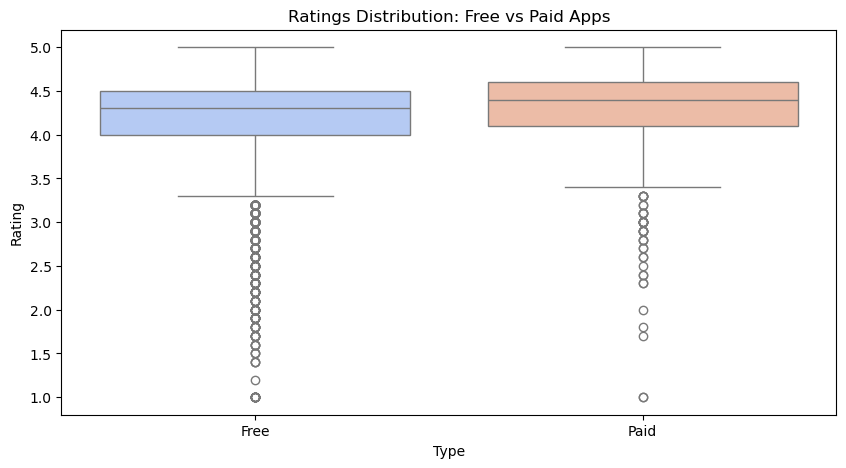

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.boxplot(data=df_store, x="Type", y="Rating",hue="Type", palette="coolwarm", legend=False)
plt.title("Ratings Distribution: Free vs Paid Apps")
plt.savefig("images/Ratings Distribution- Free vs Paid Apps.png", bbox_inches='tight')
plt.show();


C:\Users\RenukaHebasur\AppData\Local\Temp\ipykernel_940\1419898239.py:28: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.savefig("images/Relationship between Rating and Installs.png", dpi=300, bbox_inches='tight')
C:\Users\RenukaHebasur\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


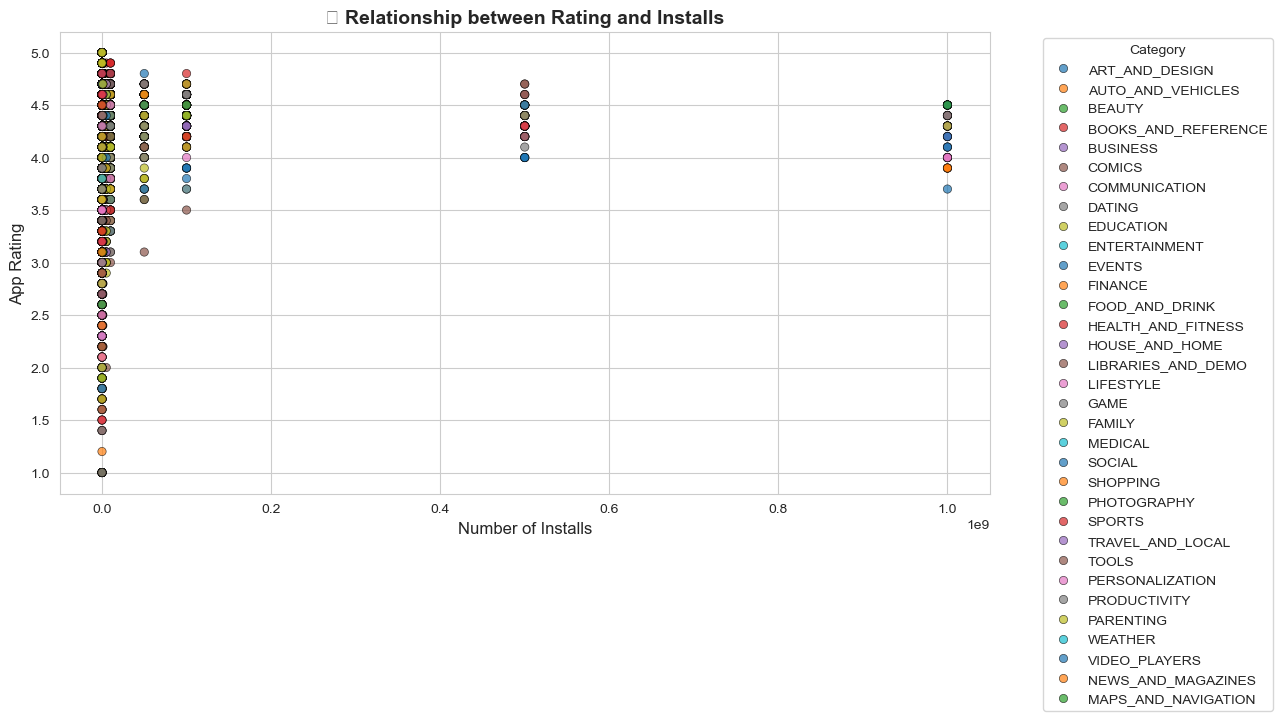

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set_style("whitegrid")

# Create figure
plt.figure(figsize=(12, 6))

# Scatter plot with better aesthetics
sns.scatterplot(
    data=df_store, 
    x="Installs", 
    y="Rating", 
    hue="Category", 
    palette="tab10",   # More distinguishable colors
    alpha=0.7,         # Transparency for better visibility
    edgecolor="black"  # Black edges for contrast
)

# Improve labels and title
plt.xlabel("Number of Installs", fontsize=12)
plt.ylabel("App Rating", fontsize=12)
plt.title("📊 Relationship between Rating and Installs", fontsize=14, fontweight="bold")

# Improve legend placement
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.savefig("images/Relationship between Rating and Installs.png", dpi=300, bbox_inches='tight')

# Show plot
plt.show()


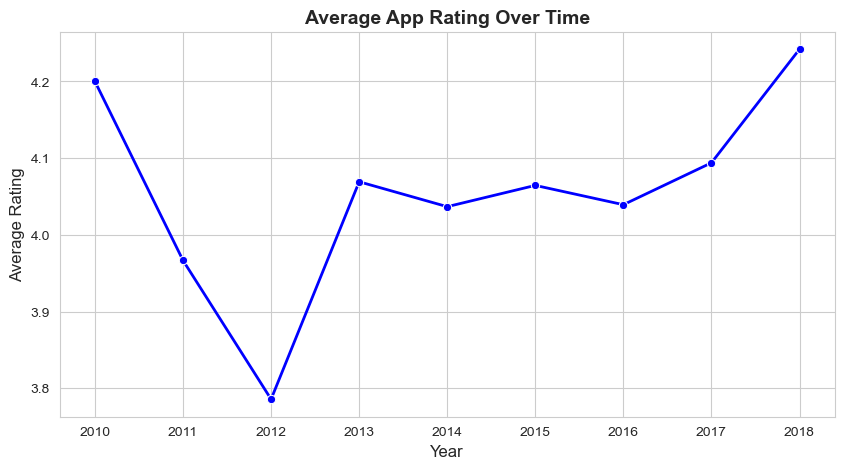

In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert "Last Updated" to datetime format
df_store["Last Updated"] = pd.to_datetime(df_store["Last Updated"], errors="coerce")

# Group by year and calculate average rating
df_time = df_store.groupby(df_store["Last Updated"].dt.year)["Rating"].mean().reset_index()

# Set style
sns.set_style("whitegrid")

# Create figure
plt.figure(figsize=(10, 5))

# Line plot
sns.lineplot(data=df_time, x="Last Updated", y="Rating", marker="o", linewidth=2, color="blue")

# Improve labels and title
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.title("Average App Rating Over Time", fontsize=14, fontweight="bold")
plt.savefig("images/Average App Rating Over Time.png", dpi=300, bbox_inches='tight')
# Show plot
plt.show()
